In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt

%matplotlib inline

In [2]:
#Figura 7.1 para binários

#Exemplo, Substância A e Substância B

#Correlações para pressão de saturação

def calc_Psat(T):
    Psat0 = 10**( 4.02291 - 1452.711/(T-42.619)) #P in bar T in K from http://webbook.nist.gov/cgi/cbook.cgi?ID=C56235&Mask=4
    Psat1 = 10**( 3.01722 - 1312.472/(T-51.119))
    return Psat0, Psat1

def calc_TELV(P):
    T_ELV0 = (1452.711/(4.02291-np.log10(P)))+42.619 #P in bar T in K from http://webbook.nist.gov/cgi/cbook.cgi?ID=C56235&Mask=4
    T_ELV1 = (1312.472/(3.01722-np.log10(P)))+51.119
    return T_ELV0, T_ELV1

#Margules de dois sufixos
def calc_gamma(x):
    a12 = 1.235
    a21 = 0.518
    
    gamma0 = np.exp((a12 + 2*(a21-a12)*(x[0]))*(x[1]**2))
    gamma1 = np.exp((a21 + 2*(a12-a21)*(x[1]))*(x[0]**2))
    return gamma0, gamma1

In [22]:
def T_bol(P,x):
    
    #Etapa 1 - Definição da Função resíduo e uso do método de Newton para achar T
    def Residual(T,P,x):
        Psat = calc_Psat(T)
        gamma = calc_gamma(x)
        sum_=0
        for i in range(len(x)):
            sum_ += x[i]*gamma[i]*Psat[i]
        
        Res = P - sum_
        return(Res)
    
    #Figura 7.2 - Método de Newton-Raphson para busca de raízes
    T_ELV = calc_TELV(P)
    
    T_guess = 0
    for i in range(len(x)):
        T_guess += x[i]*T_ELV[i]
    
    T=opt.newton(lambda T: Residual(T,P,x), x0=T_guess, fprime=None, args=(), tol=1.e-8, maxiter=100, fprime2=None)
    
    #Etapa 2 - Cálculo de y
    Psat = calc_Psat(T)
    gamma = calc_gamma(x)
    y = np.zeros(len(x))
    y[:] = x[:]*Psat[:]*gamma[:]/P

    return T, y

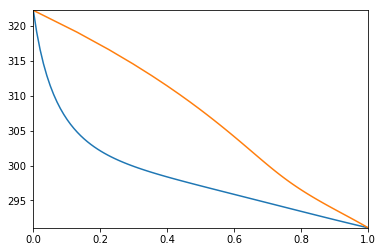

In [24]:
P = 0.015#bar

x_ = np.linspace(0,1,100)
x__ = 1 - x_

xf_ = np.concatenate((np.array([x_]).T,np.array([x__]).T),axis=1)

T_axis1 = np.zeros(100)
y_axis1 = np.zeros([100,2])

for i in range(0,100):
     T_axis1[i], y_axis1[i] = T_bol(P, xf_[i,:])

plt.plot(x_,T_axis1)
plt.plot(y_axis1[:,0],T_axis1)
plt.xlim(0,1)
TELV_lim = calc_TELV(P)
plt.ylim(min(TELV_lim),max(TELV_lim))

plt.show()